# Retention Modeling at Scholastic Travel Company (A)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
xlsx = pd.ExcelFile('DataMay27th.xlsx')
df = pd.read_excel(xlsx, 1, header=[0])
pd.set_option('display.max_columns', None)
df.head()

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,Deposit.Date,Special.Pay,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Early.RPL,Latest.RPL,Cancelled.Pax,Total.Discount.Pax,Initial.System.Date,Poverty.Code,Region,CRM.Segment,School.Type,Parent.Meeting.Flag,MDR.Low.Grade,MDR.High.Grade,Total.School.Enrollment,Income.Level,EZ.Pay.Take.Up.Rate,School.Sponsor,SPR.Product.Type,SPR.New.Existing,FPP,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,DepartureMonth,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0.0,1.0,A,2011-01-14,2011-01-14,2010-08-30,NaN,424.0,25.0,3.0,0.424,2010-03-29,2010-08-12,3.0,4.0,2010-03-26,B,Southern California,4.0,PUBLIC,1.0,K,5.0,927.0,Q,0.170,1.0,CA History,EXISTING,59.0,63.0,424.0,1.0,2010-08-12,2010-08-12,155.0,155.0,Elementary,Elementary,Elementary->Elementary,January,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0
1,2,HC,8.0,8.0,AZ,0.0,7.0,A,2011-01-14,2011-01-21,2009-11-15,CP,2350.0,9.0,9.0,0.409,2009-10-20,2010-08-10,11.0,3.0,2009-10-02,C,Other,10.0,PUBLIC,1.0,7,8.0,850.0,A,0.091,0.0,East Coast,EXISTING,22.0,25.0,2350.0,2.0,2009-11-17,2010-08-27,423.0,140.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0
2,3,HD,8.0,8.0,FL,0.0,3.0,A,2011-01-15,2011-01-17,2010-10-15,NaN,1181.0,17.0,6.0,0.708,2010-04-29,2010-08-16,6.0,3.0,2010-01-28,C,Other,10.0,PUBLIC,1.0,6,8.0,955.0,O,0.042,0.0,East Coast,EXISTING,24.0,27.0,1181.0,1.0,2010-09-13,2010-09-13,124.0,124.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0
3,4,HN,9.0,12.0,VA,1.0,3.0,B,2011-01-15,2011-01-17,2011-01-07,NaN,376.0,0.0,0.0,0.000,NaT,NaT,1.0,0.0,2010-10-19,NaN,Other,7.0,CHD,0.0,NaN,NaN,NaN,NaN,0.000,0.0,East Coast,EXISTING,18.0,18.0,376.0,0.0,NaT,NaT,NaN,NaN,High,High,High->High,January,Undefined,Undefined,Undefined->Undefined,H,0.0,NaN,1.000000,0.0,NaN,0.0
4,5,HD,6.0,8.0,FL,0.0,6.0,T,2011-01-16,2011-01-21,2010-09-30,NaN,865.0,40.0,8.0,0.494,2010-03-29,2010-08-12,9.0,8.0,2010-03-23,D,Other,10.0,PUBLIC,1.0,6,8.0,720.0,C,0.383,0.0,East Coast,EXISTING,81.0,89.0,865.0,1.0,2010-08-24,2010-08-24,145.0,145.0,Middle,Middle,Middle->Middle,January,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,8.0,M-L,0.0


In [3]:
df.shape

(2392, 56)

In [4]:
#df.info()

In [5]:
#df.isnull().sum(axis = 0)

In [6]:
df.loc[pd.isna(df['Program.Code']), :].index

Int64Index([2389, 2390, 2391], dtype='int64')

In [7]:
df.iloc[2389:2392]

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,Deposit.Date,Special.Pay,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Early.RPL,Latest.RPL,Cancelled.Pax,Total.Discount.Pax,Initial.System.Date,Poverty.Code,Region,CRM.Segment,School.Type,Parent.Meeting.Flag,MDR.Low.Grade,MDR.High.Grade,Total.School.Enrollment,Income.Level,EZ.Pay.Take.Up.Rate,School.Sponsor,SPR.Product.Type,SPR.New.Existing,FPP,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,DepartureMonth,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
2389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2391,Data source: Company data adjusted by author u...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.drop(df.index[[2389, 2390, 2391]])

In [9]:
df.isnull().sum(axis = 0)

ID                                   0
Program.Code                         0
From.Grade                         127
To.Grade                           150
Group.State                          0
Is.Non.Annual.                       0
Days                                 0
Travel.Type                          0
Departure.Date                       0
Return.Date                          0
Deposit.Date                         0
Special.Pay                       1919
Tuition                              0
FRP.Active                           0
FRP.Cancelled                        0
FRP.Take.up.percent.                 0
Early.RPL                          673
Latest.RPL                          19
Cancelled.Pax                        0
Total.Discount.Pax                   0
Initial.System.Date                  8
Poverty.Code                       599
Region                               0
CRM.Segment                          4
School.Type                          0
Parent.Meeting.Flag      

In [10]:
df = df.drop(['ID', 'From.Grade', 'To.Grade',
     'Departure.Date', 'Return.Date', 'Deposit.Date',
     'Special.Pay', 'FRP.Take.up.percent.',
     'Early.RPL', 'Latest.RPL', 'Initial.System.Date',
     'MDR.Low.Grade', 'MDR.High.Grade',
     'Total.School.Enrollment', 'FirstMeeting', 'LastMeeting',
     'DifferenceTraveltoFirstMeeting', 'DifferenceTraveltoLastMeeting',
     'SchoolGradeTypeLow', 'SchoolGradeTypeHigh', 'SchoolGradeType',
     'FirstMeeting', 'LastMeeting',
     'DifferenceTraveltoFirstMeeting', 'DifferenceTraveltoLastMeeting',
     'SchoolGradeTypeLow', 'SchoolGradeTypeHigh', 'SchoolGradeType',
     'GroupGradeTypeLow', 'GroupGradeTypeHigh', 'GroupGradeType',
     'FPP.to.School.enrollment', 'FPP.to.PAX'], axis = 1)
df.head()

,Program.Code,Group.State,Is.Non.Annual.,Days,Travel.Type,Tuition,FRP.Active,FRP.Cancelled,Cancelled.Pax,Total.Discount.Pax,Poverty.Code,Region,CRM.Segment,School.Type,Parent.Meeting.Flag,Income.Level,EZ.Pay.Take.Up.Rate,School.Sponsor,SPR.Product.Type,SPR.New.Existing,FPP,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,DepartureMonth,MajorProgramCode,SingleGradeTripFlag,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,HS,CA,0.0,1.0,A,424.0,25.0,3.0,3.0,4.0,B,Southern California,4.0,PUBLIC,1.0,Q,0.170,1.0,CA History,EXISTING,59.0,63.0,424.0,1.0,January,H,1.0,4.0,L,1.0
1,HC,AZ,0.0,7.0,A,2350.0,9.0,9.0,11.0,3.0,C,Other,10.0,PUBLIC,1.0,A,0.091,0.0,East Coast,EXISTING,22.0,25.0,2350.0,2.0,January,H,1.0,3.0,L,1.0
2,HD,FL,0.0,3.0,A,1181.0,17.0,6.0,6.0,3.0,C,Other,10.0,PUBLIC,1.0,O,0.042,0.0,East Coast,EXISTING,24.0,27.0,1181.0,1.0,January,H,1.0,3.0,L,1.0
3,HN,VA,1.0,3.0,B,376.0,0.0,0.0,1.0,0.0,NaN,Other,7.0,CHD,0.0,NaN,0.000,0.0,East Coast,EXISTING,18.0,18.0,376.0,0.0,January,H,0.0,0.0,NaN,0.0
4,HD,FL,0.0,6.0,T,865.0,40.0,8.0,9.0,8.0,D,Other,10.0,PUBLIC,1.0,C,0.383,0.0,East Coast,EXISTING,81.0,89.0,865.0,1.0,January,H,0.0,8.0,M-L,0.0


In [11]:
df.shape

(2389, 30)

In [12]:
count_dict = df['Program.Code'].value_counts()
encoded = df['Program.Code'].map(count_dict)
df['Program.Code'] = encoded

count_dict = df['Group.State'].value_counts()
encoded = df['Group.State'].map(count_dict)
df['Group.State'] = encoded

count_dict = df['Travel.Type'].value_counts()
encoded = df['Travel.Type'].map(count_dict)
df['Travel.Type'] = encoded

count_dict = df['Poverty.Code'].value_counts()
encoded = df['Poverty.Code'].map(count_dict)
df['Poverty.Code'] = encoded

count_dict = df['Region'].value_counts()
encoded = df['Region'].map(count_dict)
df['Region'] = encoded

count_dict = df['School.Type'].value_counts()
encoded = df['School.Type'].map(count_dict)
df['School.Type'] = encoded

count_dict = df['Income.Level'].value_counts()
encoded = df['Income.Level'].map(count_dict)
df['Income.Level'] = encoded

count_dict = df['SPR.Product.Type'].value_counts()
encoded = df['SPR.Product.Type'].map(count_dict)
df['SPR.Product.Type'] = encoded

count_dict = df['SPR.New.Existing'].value_counts()
encoded = df['SPR.New.Existing'].map(count_dict)
df['SPR.New.Existing'] = encoded

count_dict = df['DepartureMonth'].value_counts()
encoded = df['DepartureMonth'].map(count_dict)
df['DepartureMonth'] = encoded

count_dict = df['MajorProgramCode'].value_counts()
encoded = df['MajorProgramCode'].map(count_dict)
df['MajorProgramCode'] = encoded

count_dict = df['SchoolSizeIndicator'].value_counts()
encoded = df['SchoolSizeIndicator'].map(count_dict)
df['SchoolSizeIndicator'] = encoded

df.head()

,Program.Code,Group.State,Is.Non.Annual.,Days,Travel.Type,Tuition,FRP.Active,FRP.Cancelled,Cancelled.Pax,Total.Discount.Pax,Poverty.Code,Region,CRM.Segment,School.Type,Parent.Meeting.Flag,Income.Level,EZ.Pay.Take.Up.Rate,School.Sponsor,SPR.Product.Type,SPR.New.Existing,FPP,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,DepartureMonth,MajorProgramCode,SingleGradeTripFlag,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,131,718,0.0,1.0,2014,424.0,25.0,3.0,3.0,4.0,961.0,443,4.0,1818,1.0,283.0,0.170,1.0,175,1607,59.0,63.0,424.0,1.0,9,2049,1.0,4.0,597.0,1.0
1,274,53,0.0,7.0,2014,2350.0,9.0,9.0,11.0,3.0,507.0,1165,10.0,1818,1.0,20.0,0.091,0.0,2005,1607,22.0,25.0,2350.0,2.0,9,2049,1.0,3.0,597.0,1.0
2,1430,62,0.0,3.0,2014,1181.0,17.0,6.0,6.0,3.0,507.0,1165,10.0,1818,1.0,266.0,0.042,0.0,2005,1607,24.0,27.0,1181.0,1.0,9,2049,1.0,3.0,597.0,1.0
3,73,18,1.0,3.0,367,376.0,0.0,0.0,1.0,0.0,NaN,1165,7.0,257,0.0,NaN,0.000,0.0,2005,1607,18.0,18.0,376.0,0.0,9,2049,0.0,0.0,NaN,0.0
4,1430,62,0.0,6.0,6,865.0,40.0,8.0,9.0,8.0,36.0,1165,10.0,1818,1.0,67.0,0.383,0.0,2005,1607,81.0,89.0,865.0,1.0,9,2049,0.0,8.0,594.0,0.0


In [13]:
df.isnull().sum(axis = 0)

Program.Code                     0
Group.State                      0
Is.Non.Annual.                   0
Days                             0
Travel.Type                      0
Tuition                          0
FRP.Active                       0
FRP.Cancelled                    0
Cancelled.Pax                    0
Total.Discount.Pax               0
Poverty.Code                   599
Region                           0
CRM.Segment                      4
School.Type                      0
Parent.Meeting.Flag              0
Income.Level                    62
EZ.Pay.Take.Up.Rate              0
School.Sponsor                   0
SPR.Product.Type                 0
SPR.New.Existing                 0
FPP                              0
Total.Pax                        0
SPR.Group.Revenue                0
NumberOfMeetingswithParents      0
DepartureMonth                   0
MajorProgramCode                 0
SingleGradeTripFlag              0
Num.of.Non_FPP.PAX               0
SchoolSizeIndicator 

<AxesSubplot:title={'center':'Correlation Matrix'}>

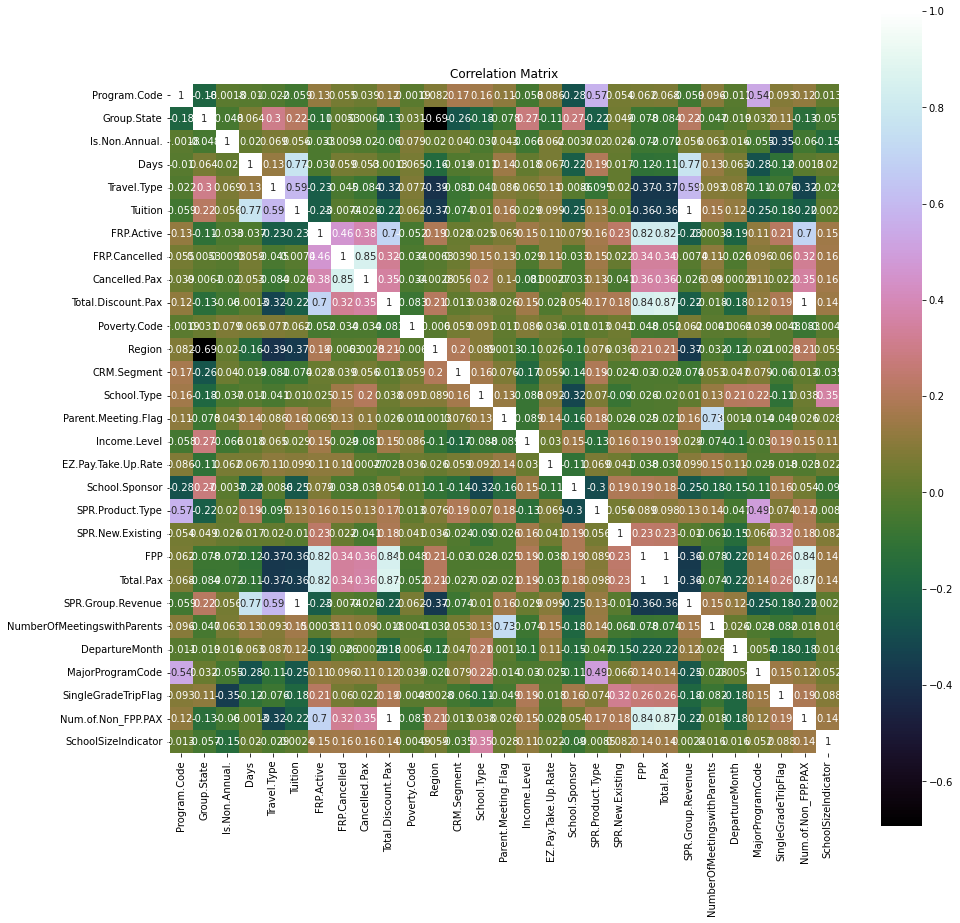

In [14]:
df_IV = df.loc[:, 'Program.Code':'SchoolSizeIndicator']
correlation = df_IV.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [15]:
df.columns = df.columns.str.replace('.', '')
df.head()

C:\Users\jazzn\AppData\Local\Temp\ipykernel_19444\3187719008.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '')


,ProgramCode,GroupState,IsNonAnnual,Days,TravelType,Tuition,FRPActive,FRPCancelled,CancelledPax,TotalDiscountPax,PovertyCode,Region,CRMSegment,SchoolType,ParentMeetingFlag,IncomeLevel,EZPayTakeUpRate,SchoolSponsor,SPRProductType,SPRNewExisting,FPP,TotalPax,SPRGroupRevenue,NumberOfMeetingswithParents,DepartureMonth,MajorProgramCode,SingleGradeTripFlag,NumofNon_FPPPAX,SchoolSizeIndicator,Retainedin2012
0,131,718,0.0,1.0,2014,424.0,25.0,3.0,3.0,4.0,961.0,443,4.0,1818,1.0,283.0,0.170,1.0,175,1607,59.0,63.0,424.0,1.0,9,2049,1.0,4.0,597.0,1.0
1,274,53,0.0,7.0,2014,2350.0,9.0,9.0,11.0,3.0,507.0,1165,10.0,1818,1.0,20.0,0.091,0.0,2005,1607,22.0,25.0,2350.0,2.0,9,2049,1.0,3.0,597.0,1.0
2,1430,62,0.0,3.0,2014,1181.0,17.0,6.0,6.0,3.0,507.0,1165,10.0,1818,1.0,266.0,0.042,0.0,2005,1607,24.0,27.0,1181.0,1.0,9,2049,1.0,3.0,597.0,1.0
3,73,18,1.0,3.0,367,376.0,0.0,0.0,1.0,0.0,NaN,1165,7.0,257,0.0,NaN,0.000,0.0,2005,1607,18.0,18.0,376.0,0.0,9,2049,0.0,0.0,NaN,0.0
4,1430,62,0.0,6.0,6,865.0,40.0,8.0,9.0,8.0,36.0,1165,10.0,1818,1.0,67.0,0.383,0.0,2005,1607,81.0,89.0,865.0,1.0,9,2049,0.0,8.0,594.0,0.0


In [16]:
# Multivariate feature imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
df_MFI = df.copy()
imp = IterativeImputer()
imp = IterativeImputer(max_iter=10, random_state=10)
imp.fit(df_MFI)
df_MFI = pd.DataFrame(imp.transform(df_MFI), columns = df_MFI.columns)

#df1 = df.copy()
#imputer = IterativeImputer(max_iter=10, random_state=10)
#df1.PovertyCode = imputer.fit_transform(df1['PovertyCode'].values.reshape(-1,1))[:,0]

#df2 = df1.copy()
#imputer = IterativeImputer(max_iter=10, random_state=10)
#df2.CRMSegment = imputer.fit_transform(df2['CRMSegment'].values.reshape(-1,1))[:,0]

#df3 = df2.copy()
#imputer = IterativeImputer(max_iter=10, random_state=10)
#df3.IncomeLevel = imputer.fit_transform(df3['IncomeLevel'].values.reshape(-1,1))[:,0]

#df_MFI = df3.copy()
#imputer = IterativeImputer(max_iter=10, random_state=10)
#df_MFI.SchoolSizeIndicator = imputer.fit_transform(df_MFI['SchoolSizeIndicator'].values.reshape(-1,1))[:,0]

df_MFI.head()

,ProgramCode,GroupState,IsNonAnnual,Days,TravelType,Tuition,FRPActive,FRPCancelled,CancelledPax,TotalDiscountPax,PovertyCode,Region,CRMSegment,SchoolType,ParentMeetingFlag,IncomeLevel,EZPayTakeUpRate,SchoolSponsor,SPRProductType,SPRNewExisting,FPP,TotalPax,SPRGroupRevenue,NumberOfMeetingswithParents,DepartureMonth,MajorProgramCode,SingleGradeTripFlag,NumofNon_FPPPAX,SchoolSizeIndicator,Retainedin2012
0,131.0,718.0,0.0,1.0,2014.0,424.0,25.0,3.0,3.0,4.0,961.000000,443.0,4.0,1818.0,1.0,283.000000,0.170,1.0,175.0,1607.0,59.0,63.0,424.0,1.0,9.0,2049.0,1.0,4.0,597.000000,1.0
1,274.0,53.0,0.0,7.0,2014.0,2350.0,9.0,9.0,11.0,3.0,507.000000,1165.0,10.0,1818.0,1.0,20.000000,0.091,0.0,2005.0,1607.0,22.0,25.0,2350.0,2.0,9.0,2049.0,1.0,3.0,597.000000,1.0
2,1430.0,62.0,0.0,3.0,2014.0,1181.0,17.0,6.0,6.0,3.0,507.000000,1165.0,10.0,1818.0,1.0,266.000000,0.042,0.0,2005.0,1607.0,24.0,27.0,1181.0,1.0,9.0,2049.0,1.0,3.0,597.000000,1.0
3,73.0,18.0,1.0,3.0,367.0,376.0,0.0,0.0,1.0,0.0,479.355942,1165.0,7.0,257.0,0.0,136.802991,0.000,0.0,2005.0,1607.0,18.0,18.0,376.0,0.0,9.0,2049.0,0.0,0.0,553.289513,0.0
4,1430.0,62.0,0.0,6.0,6.0,865.0,40.0,8.0,9.0,8.0,36.000000,1165.0,10.0,1818.0,1.0,67.000000,0.383,0.0,2005.0,1607.0,81.0,89.0,865.0,1.0,9.0,2049.0,0.0,8.0,594.000000,0.0


In [17]:
df_MFI.columns = df_MFI.columns.str.replace('.', '')
df_MFI.head()

C:\Users\jazzn\AppData\Local\Temp\ipykernel_19444\1628211016.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_MFI.columns = df_MFI.columns.str.replace('.', '')


,ProgramCode,GroupState,IsNonAnnual,Days,TravelType,Tuition,FRPActive,FRPCancelled,CancelledPax,TotalDiscountPax,PovertyCode,Region,CRMSegment,SchoolType,ParentMeetingFlag,IncomeLevel,EZPayTakeUpRate,SchoolSponsor,SPRProductType,SPRNewExisting,FPP,TotalPax,SPRGroupRevenue,NumberOfMeetingswithParents,DepartureMonth,MajorProgramCode,SingleGradeTripFlag,NumofNon_FPPPAX,SchoolSizeIndicator,Retainedin2012
0,131.0,718.0,0.0,1.0,2014.0,424.0,25.0,3.0,3.0,4.0,961.000000,443.0,4.0,1818.0,1.0,283.000000,0.170,1.0,175.0,1607.0,59.0,63.0,424.0,1.0,9.0,2049.0,1.0,4.0,597.000000,1.0
1,274.0,53.0,0.0,7.0,2014.0,2350.0,9.0,9.0,11.0,3.0,507.000000,1165.0,10.0,1818.0,1.0,20.000000,0.091,0.0,2005.0,1607.0,22.0,25.0,2350.0,2.0,9.0,2049.0,1.0,3.0,597.000000,1.0
2,1430.0,62.0,0.0,3.0,2014.0,1181.0,17.0,6.0,6.0,3.0,507.000000,1165.0,10.0,1818.0,1.0,266.000000,0.042,0.0,2005.0,1607.0,24.0,27.0,1181.0,1.0,9.0,2049.0,1.0,3.0,597.000000,1.0
3,73.0,18.0,1.0,3.0,367.0,376.0,0.0,0.0,1.0,0.0,479.355942,1165.0,7.0,257.0,0.0,136.802991,0.000,0.0,2005.0,1607.0,18.0,18.0,376.0,0.0,9.0,2049.0,0.0,0.0,553.289513,0.0
4,1430.0,62.0,0.0,6.0,6.0,865.0,40.0,8.0,9.0,8.0,36.000000,1165.0,10.0,1818.0,1.0,67.000000,0.383,0.0,2005.0,1607.0,81.0,89.0,865.0,1.0,9.0,2049.0,0.0,8.0,594.000000,0.0


In [18]:
df_MFI.isnull().sum(axis = 0)

ProgramCode                    0
GroupState                     0
IsNonAnnual                    0
Days                           0
TravelType                     0
Tuition                        0
FRPActive                      0
FRPCancelled                   0
CancelledPax                   0
TotalDiscountPax               0
PovertyCode                    0
Region                         0
CRMSegment                     0
SchoolType                     0
ParentMeetingFlag              0
IncomeLevel                    0
EZPayTakeUpRate                0
SchoolSponsor                  0
SPRProductType                 0
SPRNewExisting                 0
FPP                            0
TotalPax                       0
SPRGroupRevenue                0
NumberOfMeetingswithParents    0
DepartureMonth                 0
MajorProgramCode               0
SingleGradeTripFlag            0
NumofNon_FPPPAX                0
SchoolSizeIndicator            0
Retainedin2012                 0
dtype: int

In [19]:
df_MFI.duplicated().value_counts()

False    2389
dtype: int64

In [20]:
df_MFI.describe()

,ProgramCode,GroupState,IsNonAnnual,Days,TravelType,Tuition,FRPActive,FRPCancelled,CancelledPax,TotalDiscountPax,PovertyCode,Region,CRMSegment,SchoolType,ParentMeetingFlag,IncomeLevel,EZPayTakeUpRate,SchoolSponsor,SPRProductType,SPRNewExisting,FPP,TotalPax,SPRGroupRevenue,NumberOfMeetingswithParents,DepartureMonth,MajorProgramCode,SingleGradeTripFlag,NumofNon_FPPPAX,SchoolSizeIndicator,Retainedin2012
count,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000
mean,907.979489,288.452491,0.154039,4.575136,1754.259104,1615.217664,16.867727,3.305567,4.807451,2.953537,656.445081,718.249058,6.917491,1431.788614,0.858937,175.134624,0.207943,0.105902,1705.092089,1336.949770,31.297195,34.250733,1615.217664,1.102135,632.007116,1780.076601,0.556718,2.953537,576.751330,0.607367
std,640.631698,294.694249,0.361062,1.432128,602.424434,645.096047,16.942782,3.677022,4.661194,2.876422,272.000081,444.396843,2.744014,689.709356,0.348160,73.587420,0.155654,0.307777,685.730851,387.204171,29.131503,31.590096,645.096047,0.611544,226.717372,660.497089,0.496877,2.876422,36.889668,0.488439
min,1.000000,1.000000,0.000000,1.000000,2.000000,79.000000,0.000000,0.000000,0.000000,0.000000,4.000000,145.000000,1.000000,151.000000,0.000000,1.000000,0.000000,0.000000,5.000000,782.000000,2.000000,2.000000,79.000000,0.000000,9.000000,16.000000,0.000000,0.000000,507.000000,0.000000
25%,131.000000,43.000000,0.000000,4.000000,2014.000000,1174.000000,6.000000,1.000000,2.000000,1.000000,507.000000,275.000000,5.000000,1818.000000,1.000000,123.000000,0.100000,0.000000,2005.000000,782.000000,12.000000,14.000000,1174.000000,1.000000,507.000000,2049.000000,0.000000,1.000000,594.000000,0.000000
50%,1430.000000,104.000000,0.000000,5.000000,2014.000000,1700.000000,12.000000,2.000000,4.000000,2.000000,550.863461,443.000000,6.000000,1818.000000,1.000000,162.536876,0.200000,0.000000,2005.000000,1607.000000,23.000000,26.000000,1700.000000,1.000000,534.000000,2049.000000,1.000000,2.000000,597.000000,1.000000
75%,1430.000000,718.000000,0.000000,5.000000,2014.000000,2048.000000,23.000000,4.000000,6.000000,4.000000,961.000000,1165.000000,10.000000,1818.000000,1.000000,214.000000,0.292000,0.000000,2005.000000,1607.000000,41.000000,44.000000,2048.000000,1.000000,903.000000,2049.000000,1.000000,4.000000,600.000000,1.000000
max,1430.000000,718.000000,1.000000,12.000000,2014.000000,4200.000000,257.000000,45.000000,39.000000,47.000000,961.000000,1165.000000,11.000000,1818.000000,1.000000,283.000000,1.750000,1.000000,2005.000000,1607.000000,286.000000,313.000000,4200.000000,2.000000,903.000000,2049.000000,1.000000,47.000000,600.699592,1.000000


---

In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import logit
formula = ('Retainedin2012 ~ ProgramCode + GroupState + IsNonAnnual + Days + TravelType + Tuition + FRPActive + FRPCancelled + CancelledPax + TotalDiscountPax + PovertyCode + Region + CRMSegment + SchoolType + ParentMeetingFlag + IncomeLevel + EZPayTakeUpRate + SchoolSponsor + SPRProductType + SPRNewExisting + FPP + TotalPax + SPRGroupRevenue + NumberOfMeetingswithParents + DepartureMonth + MajorProgramCode + SingleGradeTripFlag + NumofNon_FPPPAX + SchoolSizeIndicator')
model = logit(formula = formula, data = df_MFI).fit()
model.summary()

         Current function value: 0.450857
         Iterations: 35


C:\Users\jazzn\anaconda3\envs\zemi\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         Retainedin2012   No. Observations:                 2389
Model:                          Logit   Df Residuals:                     2360
Method:                           MLE   Df Model:                           28
Date:                Sat, 11 Jun 2022   Pseudo R-squ.:                  0.3270
Time:                        13:28:26   Log-Likelihood:                -1077.1
converged:                      False   LL-Null:                       -1600.4
Covariance Type:            nonrobust   LLR p-value:                1.930e-202
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -6.9297      1.028     -6.740      0.000      -8.945      -4.915
ProgramCode                   8.38e-05      0.000      0.739      0.460      -0.000       0.000
GroupState                      0.0006      0.000      1.968      0.049    2.41e-06       0.001
IsNonAnnual                    -2.5127      0.178    -14.104      0.000      -2.862      -2.164
Days                            0.0467      0.083      0.561      0.574      -0.116       0.210
TravelType                      0.0002      0.000      0.994      0.320      -0.000       0.000
Tuition                         0.0002        nan        nan        nan         nan         nan
FRPActive                       0.0337      0.007      4.553      0.000       0.019       0.048
FRPCancelled                   -0.0466      0.030     -1.552      0.121      -0.106       0.012
CancelledPax                    0.0258      0.023      1.119      0.263      -0.019       0.071
TotalDiscountPax                0.0251   1.71e+06   1.47e-08      1.000   -3.35e+06    3.35e+06
PovertyCode                    -0.0001      0.000     -0.588      0.557      -0.001       0.000
Region                          0.0001      0.000      0.644      0.519      -0.000       0.000
CRMSegment                      0.0399      0.021      1.933      0.053      -0.001       0.080
SchoolType                     -0.0002      0.000     -2.235      0.025      -0.000    -2.9e-05
ParentMeetingFlag               0.0755      0.229      0.329      0.742      -0.374       0.525
IncomeLevel                     0.0007      0.001      0.838      0.402      -0.001       0.002
EZPayTakeUpRate                -0.1034      0.350     -0.296      0.768      -0.789       0.583
SchoolSponsor                   0.2165      0.241      0.899      0.369      -0.256       0.688
SPRProductType                  0.0002      0.000      1.340      0.180   -7.49e-05       0.000
SPRNewExisting                  0.0018      0.000     12.050      0.000       0.001       0.002
FPP                            -0.0146        nan        nan        nan         nan         nan
TotalPax                        0.0106        nan        nan        nan         nan         nan
SPRGroupRevenue                -0.0005        nan        nan        nan         nan         nan
NumberOfMeetingswithParents     0.0106      0.128      0.082      0.934      -0.241       0.262
DepartureMonth                 -0.0006      0.000     -2.494      0.013      -0.001      -0.000
MajorProgramCode            -9.869e-05      0.000     -0.783      0.433      -0.000       0.000
SingleGradeTripFlag             1.0016      0.117      8.558      0.000       0.772       1.231
NumofNon_FPPPAX                 0.0251   1.37e+06   1.83e-08      1.000   -2.69e+06    2.69e+06
SchoolSizeIndicator             0.0077      0.002      4.694      0.000       0.004       0.011
=========================================================================

---

In [22]:
Y = df_MFI['Retainedin2012']
X = df_MFI[['ProgramCode','GroupState','IsNonAnnual','Days','TravelType',
    'Tuition','FRPActive','FRPCancelled','CancelledPax','TotalDiscountPax',
    'PovertyCode','Region','CRMSegment','SchoolType','ParentMeetingFlag',
    'IncomeLevel','EZPayTakeUpRate','SchoolSponsor','SPRProductType',
    'SPRNewExisting','FPP','TotalPax','SPRGroupRevenue',
    'NumberOfMeetingswithParents','DepartureMonth','MajorProgramCode',
    'SingleGradeTripFlag','NumofNon_FPPPAX','SchoolSizeIndicator']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [23]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

C:\Users\jazzn\anaconda3\envs\zemi\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions = logistic.predict(x_test)
print("# Accuracy Score:")
print(accuracy_score(y_test, predictions))
print("# Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("# Classification Report:")
print(classification_report(y_test, predictions))

# Accuracy Score:
0.7573221757322176
# Confusion Matrix:
[[105  81]
 [ 35 257]]
# Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.56      0.64       186
         1.0       0.76      0.88      0.82       292

    accuracy                           0.76       478
   macro avg       0.76      0.72      0.73       478
weighted avg       0.76      0.76      0.75       478



Confusion Matrix - Logistic Regression


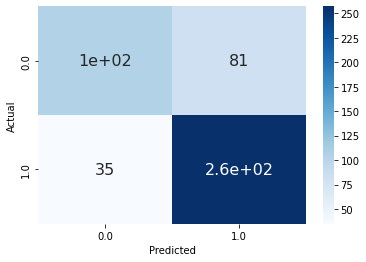

In [25]:
cm = pd.DataFrame(confusion_matrix(y_test, predictions), columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
sns.heatmap(cm, cmap = "Blues", annot=True, annot_kws={"size": 16})
print('Confusion Matrix - Logistic Regression')

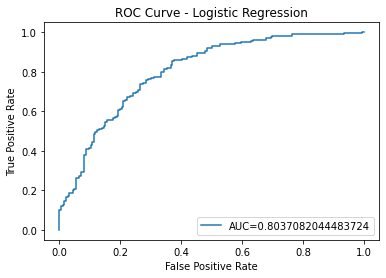

In [26]:
from sklearn import metrics
# define metrics
y_score1 = logistic.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_score1)
auc = metrics.roc_auc_score(y_test, y_score1)

# create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('ROC Curve - Logistic Regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

---

In [27]:
from sklearn.tree import DecisionTreeClassifier
CART = DecisionTreeClassifier()
CART.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(0.5766789135159726, 0.9705882352941176, 'SingleGradeTripFlag <= 0.5\ngini = 0.477\nsamples = 1911\nvalue = [752, 1159]\nclass = y[1]'),
 Text(0.32398023655479175, 0.9117647058823529, 'IsNonAnnual <= 0.5\ngini = 0.465\nsamples = 866\nvalue = [547, 319]\nclass = y[0]'),
 Text(0.2424307521229276, 0.8529411764705882, 'SPRNewExisting <= 1194.5\ngini = 0.498\nsamples = 601\nvalue = [319, 282]\nclass = y[0]'),
 Text(0.18108067124949453, 0.7941176470588235, 'CancelledPax <= 17.5\ngini = 0.393\nsamples = 335\nvalue = [245, 90]\nclass = y[0]'),
 Text(0.14622927618277395, 0.7352941176470589, 'NumofNon_FPPPAX <= 3.5\ngini = 0.376\nsamples = 323\nvalue = [242, 81]\nclass = y[0]'),
 Text(0.10483218762636475, 0.6764705882352942, 'Tuition <= 1967.0\ngini = 0.339\nsamples = 282\nvalue = [221, 61]\nclass = y[0]'),
 Text(0.05196118075212293, 0.6176470588235294, 'GroupState <= 52.0\ngini = 0.406\nsamples = 159\nvalue = [114, 45]\nclass = y[0]'),
 Text(0.021835826930853213, 0.5588235294117647, 'Progr

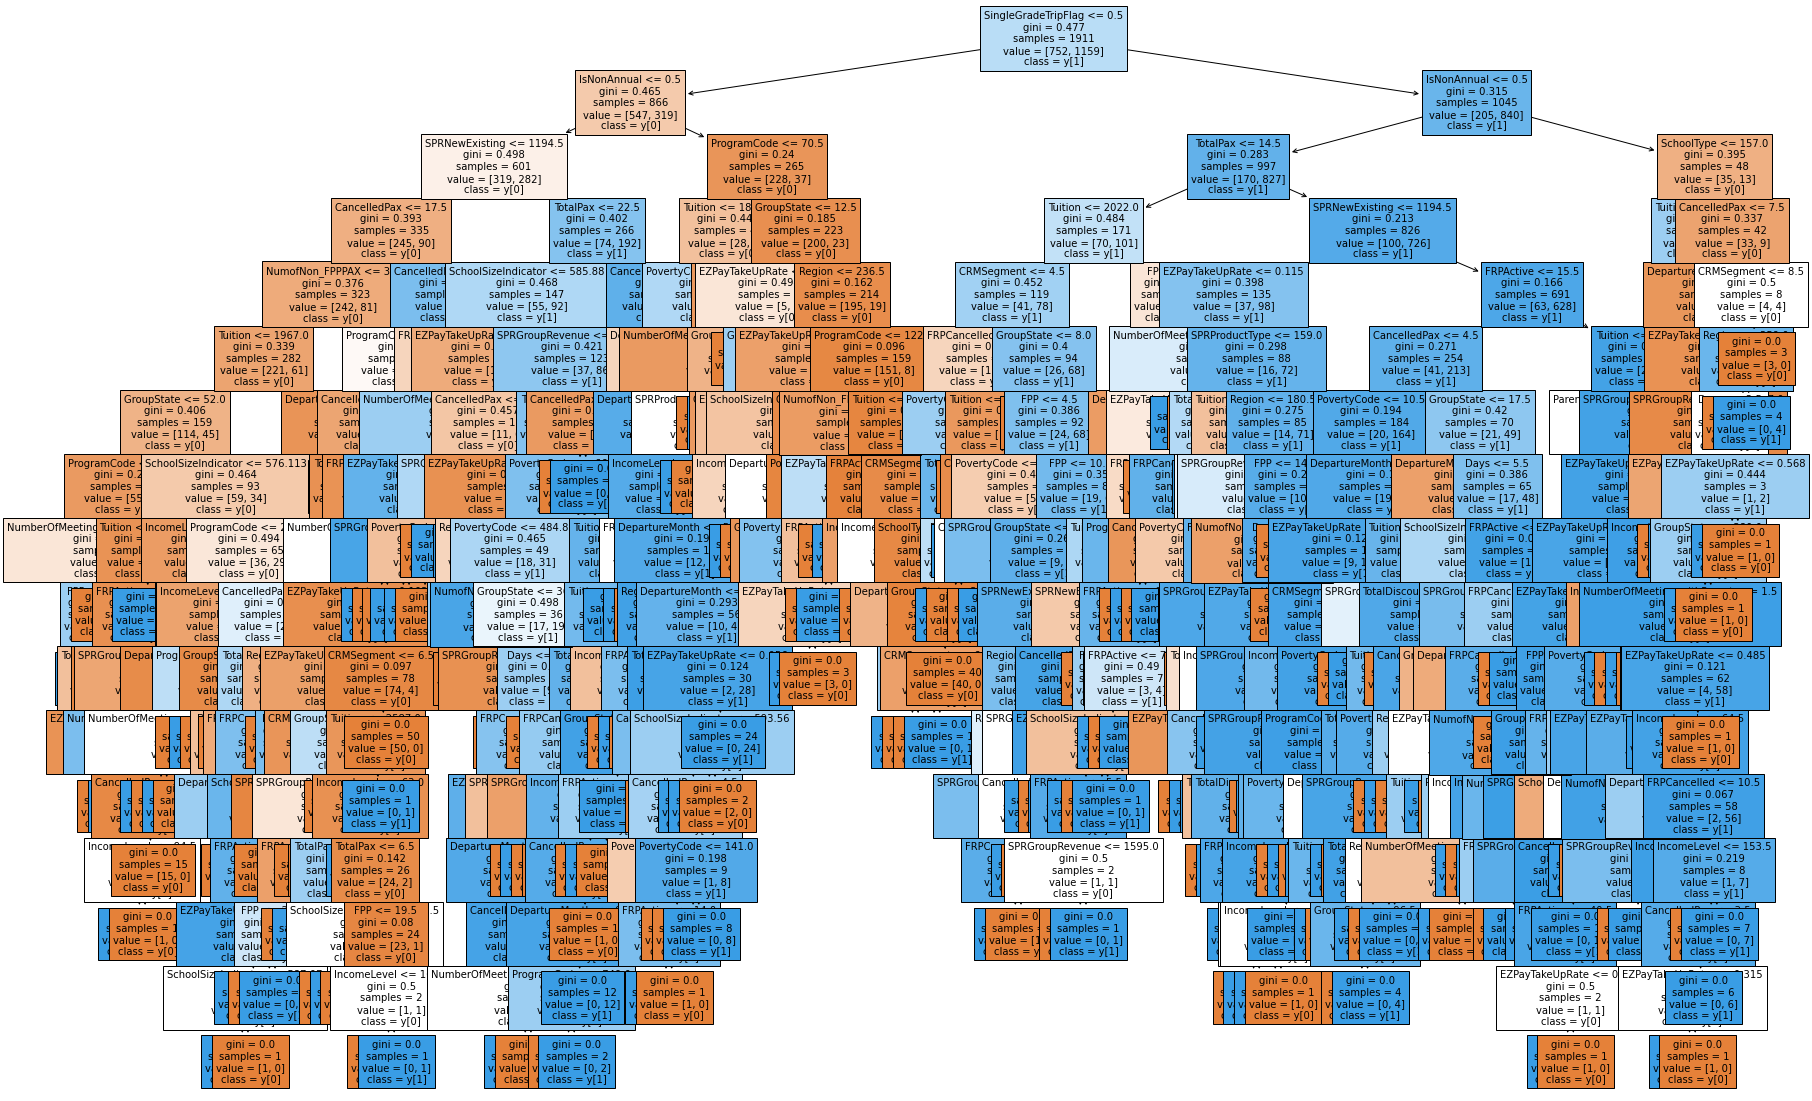

In [28]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))
plot_tree(CART, feature_names=x_train.columns, class_names=True, filled=True, fontsize=10)

In [29]:
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions = CART.predict(x_test)
print("# Accuracy Score:")
print(accuracy_score(y_test, predictions))
print("# Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("# Classification Report:")
print(classification_report(y_test, predictions))

# Accuracy Score:
0.7217573221757322
# Confusion Matrix:
[[112  74]
 [ 59 233]]
# Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.60      0.63       186
         1.0       0.76      0.80      0.78       292

    accuracy                           0.72       478
   macro avg       0.71      0.70      0.70       478
weighted avg       0.72      0.72      0.72       478



Confusion Matrix - CART


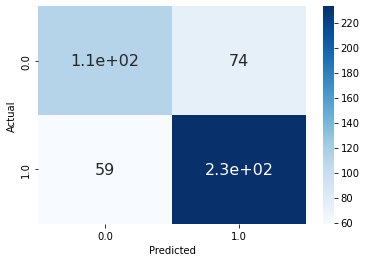

In [30]:
cm = pd.DataFrame(confusion_matrix(y_test, predictions), columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
sns.heatmap(cm, cmap = "Blues", annot=True, annot_kws={"size": 16})
print('Confusion Matrix - CART')

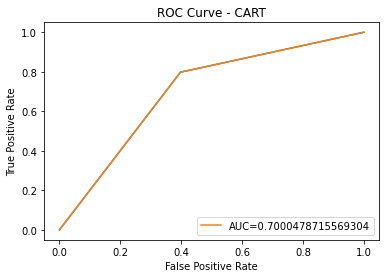

In [31]:
#from sklearn import metrics
# define metrics
y_score2 = CART.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_score2)
auc = metrics.roc_auc_score(y_test, y_score2)

# create ROC curve
plt.plot(fpr,tpr)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('ROC Curve - CART')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [32]:
CART.feature_importances_

array([0.02097651, 0.03407023, 0.07514273, 0.01956197, 0.        ,
       0.04637199, 0.04220814, 0.02504143, 0.0462452 , 0.00456973,
       0.03761852, 0.02092037, 0.01686688, 0.00327789, 0.0010963 ,
       0.03442686, 0.06087965, 0.00146173, 0.00269717, 0.07875473,
       0.03172479, 0.06225236, 0.04330739, 0.01792962, 0.03484949,
       0.        , 0.19689938, 0.01534957, 0.02549938])

In [33]:
FI = pd.DataFrame({'Feature_names':X.columns,'Importances':CART.feature_importances_})
#FI

In [34]:
FI_1 = FI.sort_values(by='Importances',ascending=False)
FI_1

,Feature_names,Importances
26,SingleGradeTripFlag,0.196899
19,SPRNewExisting,0.078755
2,IsNonAnnual,0.075143
21,TotalPax,0.062252
16,EZPayTakeUpRate,0.060880
5,Tuition,0.046372
8,CancelledPax,0.046245
22,SPRGroupRevenue,0.043307
6,FRPActive,0.042208
10,PovertyCode,0.037619


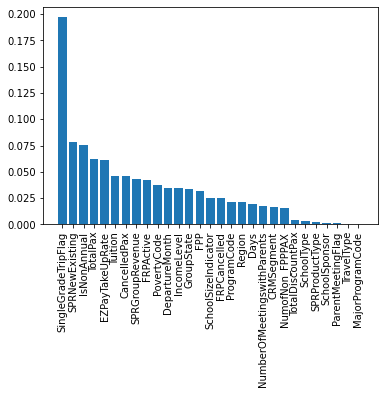

In [35]:
plt.bar(FI_1['Feature_names'],FI_1['Importances'])
plt.xticks(rotation=90)
plt.show()

---

In [36]:
from sklearn.tree import DecisionTreeClassifier
CART = DecisionTreeClassifier(criterion='entropy')
CART.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5858355296184738, 0.9782608695652174, 'SingleGradeTripFlag <= 0.5\nentropy = 0.967\nsamples = 1911\nvalue = [752, 1159]\nclass = y[1]'),
 Text(0.31546498493975905, 0.9347826086956522, 'IsNonAnnual <= 0.5\nentropy = 0.949\nsamples = 866\nvalue = [547, 319]\nclass = y[0]'),
 Text(0.20121109437751003, 0.8913043478260869, 'SPRNewExisting <= 1194.5\nentropy = 0.997\nsamples = 601\nvalue = [319, 282]\nclass = y[0]'),
 Text(0.11012801204819277, 0.8478260869565217, 'FRPActive <= 8.5\nentropy = 0.84\nsamples = 335\nvalue = [245, 90]\nclass = y[0]'),
 Text(0.06275100401606426, 0.8043478260869565, 'Tuition <= 1906.5\nentropy = 0.707\nsamples = 197\nvalue = [159, 38]\nclass = y[0]'),
 Text(0.02710843373493976, 0.7608695652173914, 'GroupState <= 52.0\nentropy = 0.854\nsamples = 86\nvalue = [62, 24]\nclass = y[0]'),
 Text(0.012048192771084338, 0.717391304347826, 'GroupState <= 17.0\nentropy = 0.439\nsamples = 33\nvalue = [30, 3]\nclass = y[0]'),
 Text(0.008032128514056224, 0.6739130434782609

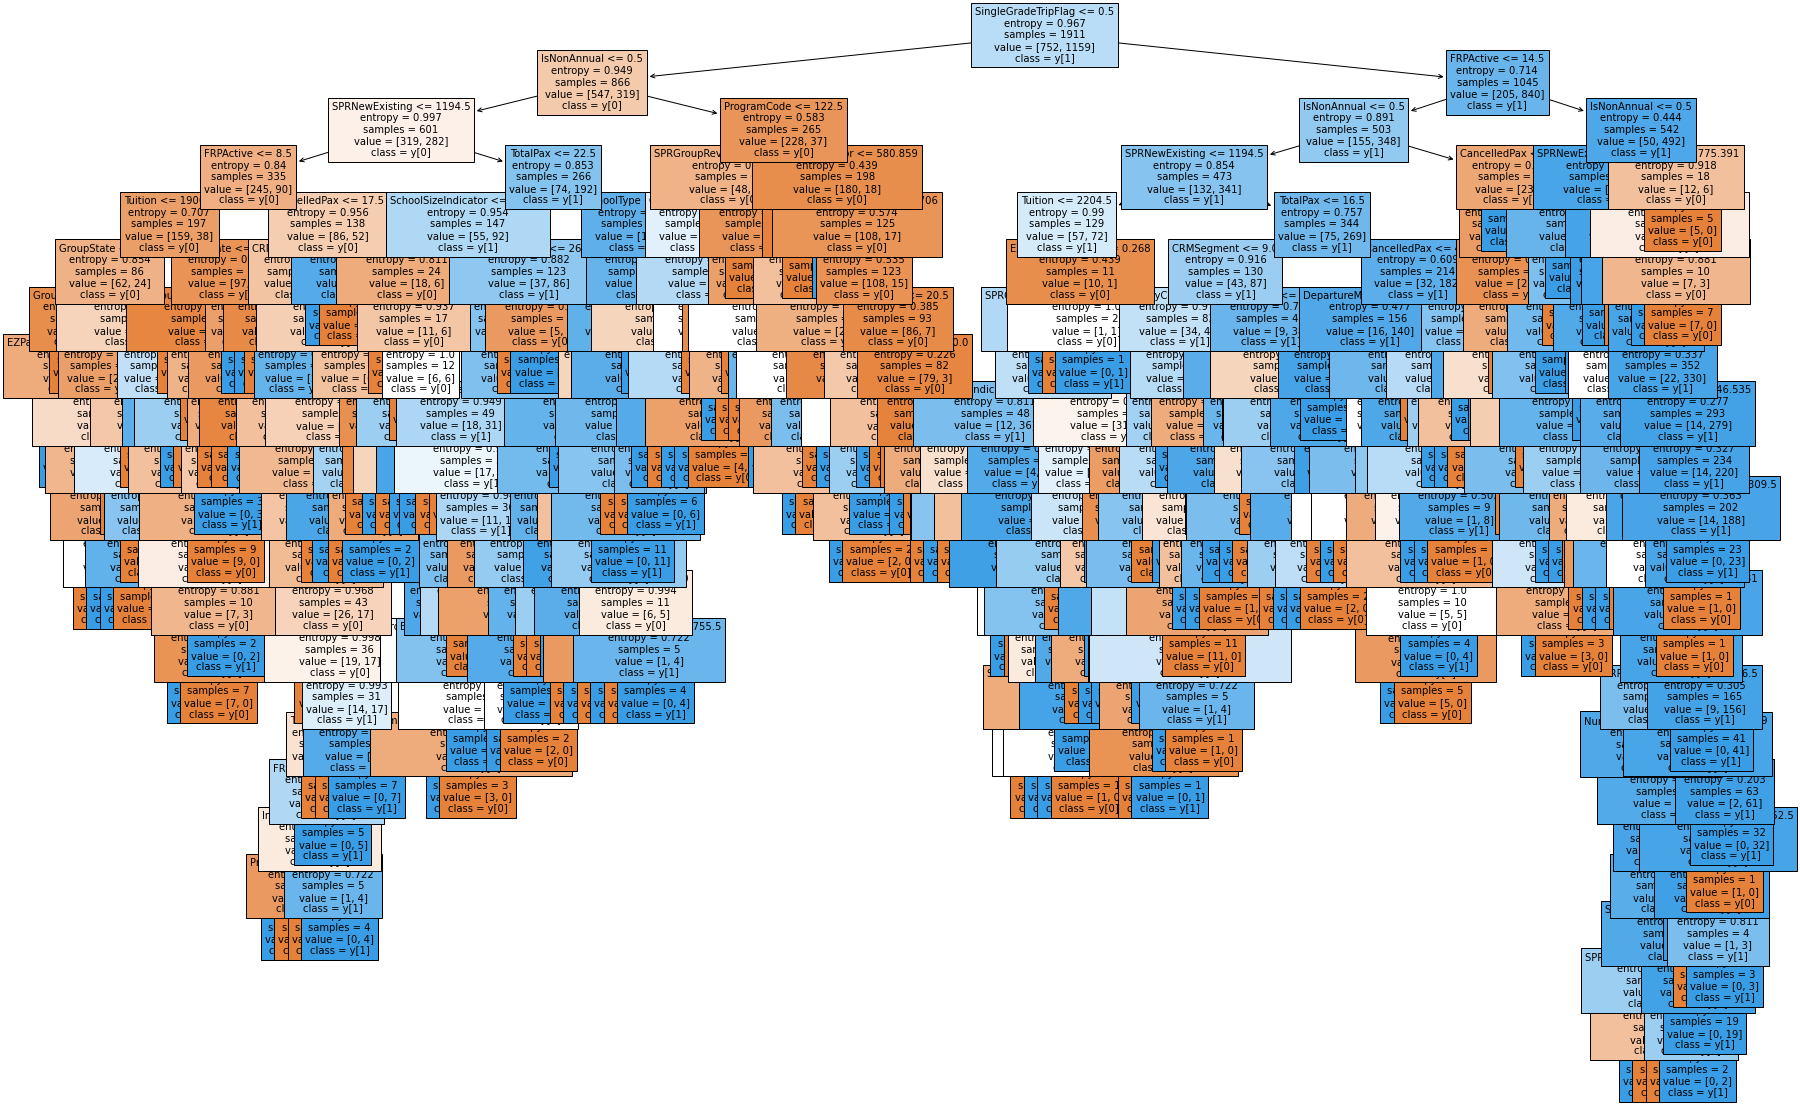

In [37]:
#from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))
plot_tree(CART, feature_names=x_train.columns, class_names=True, filled=True, fontsize=10)

In [38]:
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions = CART.predict(x_test)
print("# Accuracy Score:")
print(accuracy_score(y_test, predictions))
print("# Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("# Classification Report:")
print(classification_report(y_test, predictions))

# Accuracy Score:
0.694560669456067
# Confusion Matrix:
[[112  74]
 [ 72 220]]
# Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.60      0.61       186
         1.0       0.75      0.75      0.75       292

    accuracy                           0.69       478
   macro avg       0.68      0.68      0.68       478
weighted avg       0.69      0.69      0.69       478



Confusion Matrix - CART (criterion = entropy)


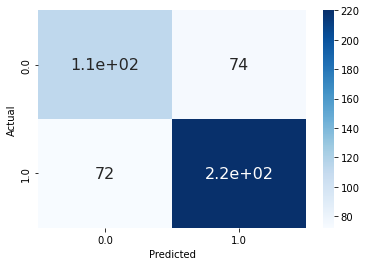

In [39]:
cm = pd.DataFrame(confusion_matrix(y_test, predictions), columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
sns.heatmap(cm, cmap = "Blues", annot=True, annot_kws={"size": 16})
print('Confusion Matrix - CART (criterion = entropy)')

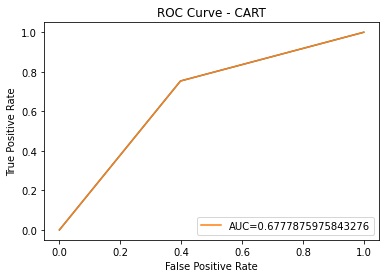

In [40]:
#from sklearn import metrics
# define metrics
y_score2 = CART.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_score2)
auc = metrics.roc_auc_score(y_test, y_score2)

# create ROC curve
plt.plot(fpr,tpr)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('ROC Curve - CART')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [41]:
CART.feature_importances_

array([0.01392657, 0.05463086, 0.06296886, 0.01806342, 0.00805396,
       0.03487608, 0.07673857, 0.04000272, 0.04286245, 0.00538766,
       0.04127185, 0.0219178 , 0.02242667, 0.00959643, 0.00400709,
       0.0359443 , 0.06898502, 0.00400655, 0.00223646, 0.06412745,
       0.03435076, 0.03340067, 0.06534352, 0.00353469, 0.02533035,
       0.00404627, 0.15122411, 0.01327554, 0.03746333])

In [42]:
FI = pd.DataFrame({'Feature_names':X.columns,'Importances':CART.feature_importances_})
#FI

In [43]:
FI_1 = FI.sort_values(by='Importances',ascending=False)
FI_1

,Feature_names,Importances
26,SingleGradeTripFlag,0.151224
6,FRPActive,0.076739
16,EZPayTakeUpRate,0.068985
22,SPRGroupRevenue,0.065344
19,SPRNewExisting,0.064127
2,IsNonAnnual,0.062969
1,GroupState,0.054631
8,CancelledPax,0.042862
10,PovertyCode,0.041272
7,FRPCancelled,0.040003


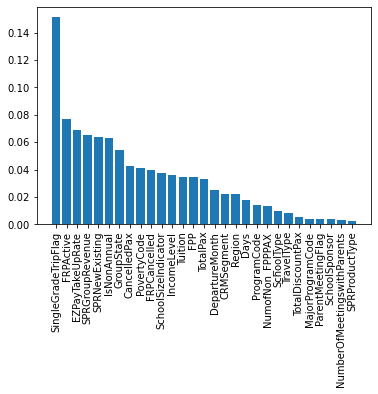

In [44]:
plt.bar(FI_1['Feature_names'],FI_1['Importances'])
plt.xticks(rotation=90)
plt.show()